### FE670 - Midterm Exam Part II

**Author**: Sid Bhatia

**Date**: November 2th, 2023

**Pledge**: I pledge my honor that I have abided by the Stevens Honor System.

**Professor**: Dr. Steve Yang

#### Background

The S&P 500 stock market index, maintained by S&P Dow Jones Indices, comprises 500 large-cap American companies covering about 75 percent of the American equity market by capitalization. The index is weighted by market capitalization, so large companies account for relatively more of the index with the symbol SPY. The amount of change in the price of these stocks will be highly correlated, as they are all part of the larger market. Factor analysis will be used to reduce the dimensionality of the 500 stocks in the S&P 500 stock market index to reflect the influence of 11 major industry sectors.

After some research, you are given a set of 20 stocks within the S&P500 stock index to build a portfolio for your client. These 20 stocks are mixed with the top 10 most volatile and 10 least volatile during the period of 2013 and 2016. The ticker symbols of these 20 stocks are: ’CHK’, ’AMD’, ’LNT’, ’FCX’, ’VRTX’, ’WMB’, ’INCY’, ’NFLX’, ’MRO’, ’MU’, ’MCD’, ’BRK.B’, ’SO’, ’T’, ’KO’, ’PG’, ’JNJ’, ’WM’, ’RSG’, ’PEP’. You can get the daily stock prices and S&P 500 index prices for the same period from Yahoo finance using Python Yahoo finance package.

Your client is afraid of any exposure to the ENERGY sector due to the high uncertainty during the last 4 years. You were asked to perform a factor analysis using the 11 major industry sector ETFs as the benchmarks of the sector performances to reflect the influence of 11 major industry sectors. These factors can then be considered in your portfolio analysis for time period from January 01, 2017 to December 31, 2020.

Again you may use Python Yahoo finance package, use factor analysis on Vanguard Sector & specialty ETFs (’VOX’, ’VCR’, ’VDC’, ’VDE’, ’VFH’, ’VHT’, ’VIS’, ’VGT’, ’VAW’, ’VNQ’, ’VPU’) which represents the following corresponding sectors: ’COMM’, ’CONSUMER DISC’, ’CONSUMER ST’, ’ENERGY’, ’FINANCIALS’, ’HEALTH’, ’INDUSTRIALS’, ’TECHNOLOGY’, ’MATIREALS’, ’REAL ESTATE’, ’UTILITIES’. The data consists of the high, low, opening, and closing price of each of the 11 ETFs for each day. This includes all data from January 01, 2017 to December 31, 2020. We also have the S&P500 index prices during the same period.

Please answer the following questions using the dataset:

#### Problem #1

Perform a factor analysis on returns of the 11 selected sector ETFs and the S&P 500 index from January 01, 2017 to December 31, 2020. Using a scree plot and by analyzing the eigenvalues of the correlation matrix, choose a sufficient number of factors for the market influence. Please provide the factor loadings for ‘VDE’ sector within the chosen important factors, and make your observations about the ENERGY sector influence. (10 points)

##### Step 1: Data Preparation

In [5]:
# Import the relevant libraries.
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

# Define the tickers for the ETFs and S&P500.
etf_tickers = ['VOX', 'VCR', 'VDC', 'VDE', 'VFH', 'VHT', 'VIS', 'VGT', 'VAW', 'VNQ', 'VPU', 'SPY']

# Fetch data for the specified period
data = yf.download(etf_tickers, start="2017-01-01", end="2020-12-31")['Close']

# Calculate daily returns.
returns_df = data.pct_change().dropna()

[*********************100%***********************]  12 of 12 completed


##### Step 2: Factor Analysis and Scree Plot

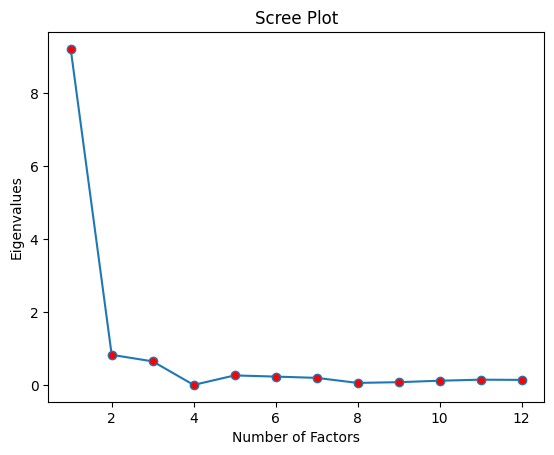

In [7]:
# Scale the returns.
scaler = StandardScaler()
scaled_returns = scaler.fit_transform(returns_df)

# Calculate the eigenvalues of the correlation matrix.
eigenvalues, eigenvectors = np.linalg.eig(returns_df.corr())

# Plot the eigenvalues.
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-', markerfacecolor='red')
plt.title('Scree Plot')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalues')
plt.show()

As seen above, the number of factors where the eigenvalues start to level off is at approximately **2 factors.**

In [8]:
num_of_factors = 2
fa = FactorAnalysis(n_components=num_of_factors)
factor_data = fa.fit_transform(scaled_returns)

# Extract factor loadings.
loadings = pd.DataFrame(fa.components_, columns=returns_df.columns).T

# Display loadings for VDE.
print(loadings.loc['VDE'])

0   -0.73071
1    0.39718
Name: VDE, dtype: float64


Above are the factor loadings for VDE which explain how much variance in VDE (Energy Sector) is explained by the underlying factors. 

For **Factor 0**, the loading is $-0.73071$ which suggests that there is a significant negative relationship between VDE and this latent factor. 

If we assume that Factor 0 represents the overall market (which is common for most factor analysis), then the Energy sector has an inverse relationship with the overall market, implying that during the period from 2017 to 2020, the Energy sector was moving opposite to the overall market. This is important since it could be a potential hedge against broader market downturns. However, this is only if Factor 0 represents the SPY. Otherwise, we can only say that VDE has a significant negative relationship with this latent factor.

For **Factor 1**, the loading is $0.39718$, which indicates a moderate positive relationship between VDE and this latent factor. This means that VDE tends to move in the same direction as this factor.

#### Problem #2

Now use data from January 01, 2017 to December 31, 2020 to build a portfolio with all 20 stocks through minimizing the return variance with a targeted return of 0.03. Assume that the portfolio weights add up to 1, allowing for short sales. Test the portfolio performance during the first 6 months of 2021 (01/01/2021 to 06/30/2021) and compare the performance of the portfolio’s daily return with the S&P 500 index daily return using Sharpe ratio. (15 points)

#### Problem #3

Consider the client’s concern with the ENERGY sector (including stocks such as CHK, LNT, WMB, and MRO), please rebuild the portfolio that would eliminate the client’s exposure to energy sector? Test the updated portfolio during the first 6 months of 2021 (01/01/2021 to 06/30/2021) and compare the performance of the portfolio’s daily return with the previous portfolio using Sharpe ratio. (15 points)